## Introducing the data

In our analysis, we will explore arrests data of 50 US states in 1973. The data is collected per 100,000 residents covering crimes such as assults, murder, rape. The data, also, contains records on percentage of the population living in urban areas.  

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


# Load the CSV file into a pandas DataFrame
df = pd.read_csv("UsArrests.csv",index_col='City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


## Exploring the data

First we examin the data.

In [77]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


We can see that all the vairables are continuse.

In [78]:
df.describe(include="all")

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,7.788,170.760,65.540,21.232
std,4.356,83.338,14.475,9.366
min,0.800,45.000,32.000,7.300
25%,4.075,109.000,54.500,15.075
50%,7.250,159.000,66.000,20.100
75%,11.250,249.000,77.750,26.175
max,17.400,337.000,91.000,46.000


The "Assault" variable has the highest mean among the three variables, indicating that on average, the number of assaults is higher than the average number of murders or rapes. The larger spread of the "Assault" variable compared to the other variables indicates that there is a wider variation in the number of assaults across the states. This is supported by the larger standard deviation and range of the "Assault" variable compared to the other variables in the data set.

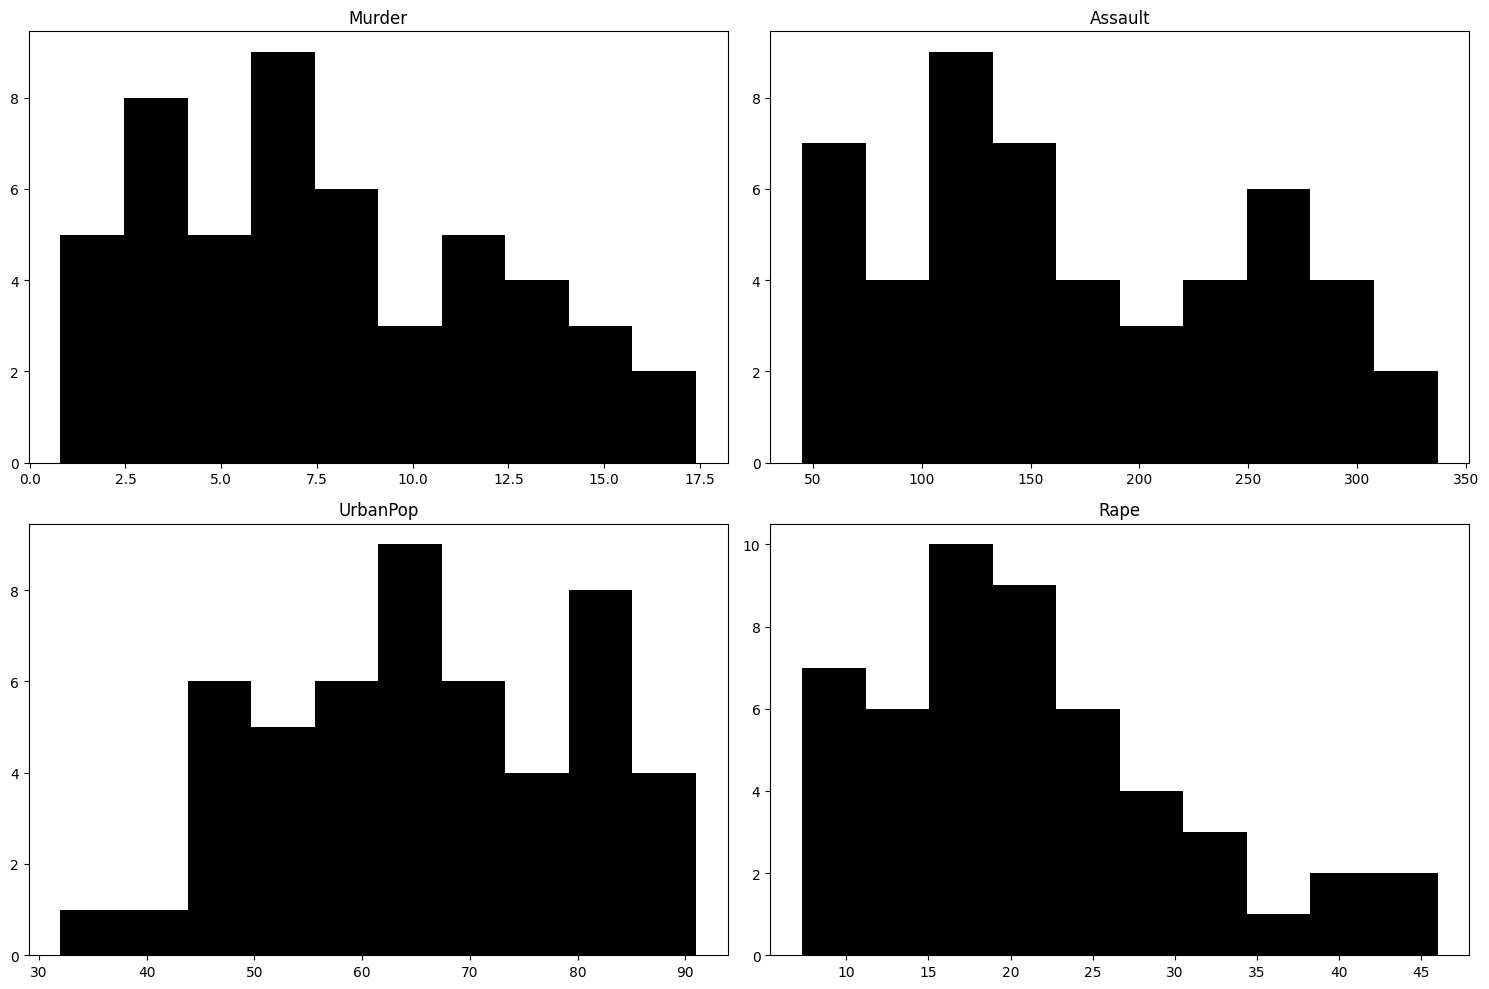

In [79]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

The confirms that 'Assault' has a singnificantly higher mean and spread. It therefore follows that scaling the data will be useful to keep the 'Assault' variable from impacting our analysis disproportionately.

In [80]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Great, none is missing. So our data is ready for PCA. 

## Correlation analysis

In [81]:
corr_df=df.corr()
corr_df

,Murder,Assault,UrbanPop,Rape
Murder,1.000,0.802,0.070,0.564
Assault,0.802,1.000,0.259,0.665
UrbanPop,0.070,0.259,1.000,0.411
Rape,0.564,0.665,0.411,1.000


C:\Users\ah060\AppData\Local\Temp\ipykernel_20980\2703723672.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot: >

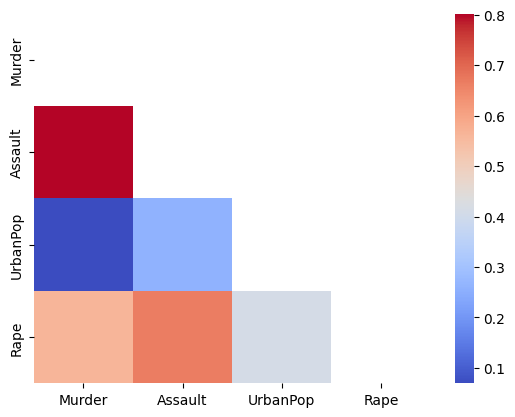

In [82]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

The correlation matrix shows that there are linear correlations between the variables in our data, with all variables showing positive correlations. The three variables relating to crime (Assault, Murder, and Rape) exhibit strong positive correlations with coefficients greater than 0.5, which is reasonable given that they are all measures of different types of crime. The high correlation between Assault and Murder may be due to the fact that these two crimes often occur together.

On the other hand, the positive correlation between 'UrbanPop' and the other variables is weaker, indicating that the population percentage in urban areas is not mainly driven by crime. Instead, this variable may be influenced by various factors such as housing, affordability, and commute to work. However, crime can still be a contributing factor, as indicated by the dark blue shading in the correlation matrix.

Given the strong correlations between some of the variables in the dataset, it is likely that we can apply principal component analysis (PCA) to reduce the dimensionality of the data. The positive correlations observed in the correlation matrix indicate that there is redundancy in the data, and PCA can help us capture the underlying structure of the data in fewer dimensions while still retaining most of the variance.

## PCA

In [83]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = df.values

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [84]:
# Create DataFrame with variance explained and cumulative variance
var_df = pd.DataFrame({
    "Standard Deviation": df_pca.describe().transpose()["std"],
    "Proportion of Variance Explained": pca.explained_variance_ratio_,
    "Cumulative Proportion of Variance Explained": np.cumsum(pca.explained_variance_ratio_)
})

var_df = var_df.T.rename(index={
    "Standard Deviation": "STD",
    "Proportion of Variance Explained": "PVE",
    "Cumulative Proportion of Variance Explained": "CPVE"
})

# Rename columns
var_df = var_df.rename(columns={
    0: "PC1",
    1: "PC2",
    2: "PC3",
    3: "PC4"
})

# Print the DataFrame
print(var_df)

        PC1    PC2   PC3   PC4
STD  83.732 14.212 6.489 2.483
PVE   0.966  0.028 0.006 0.001
CPVE  0.966  0.993 0.999 1.000


The table shows the results of the PCA analysis, with the variance explained by each principal component (PC) and the cumulative proportion of variance explained by each PC.

The first principal component (PC1) has the highest standard deviation (83.73), indicating that it captures the most variation in the data. The second principal component (PC2) has a much lower standard deviation (14.21), which suggests that it explains much less of the total variation in the data.

The proportion of variance explained (PVE) is a measure of how much of the total variance in the data is explained by each PC. PC1 explains 96.55% of the total variance, while PC2, PC3, and PC4 explain much smaller proportions of the variance (2.78%, 0.58%, and 0.08%, respectively). The cumulative proportion of variance explained (CPVE) is the total proportion of variance explained by all PCs up to and including the current PC. The CPVE for PC1 is 96.55%, which means that PC1 alone captures almost all of the variation in the data. The CPVE for PC2, PC3, and PC4 are 99.34%, 99.92%, and 100.00%, respectively.

In summary, the results suggest that the first principal component (PC1) is the most important for explaining the variation in the data, while the other PCs are much less important. This is not surprising given that PC1 captures almost all of the variance.

In [85]:
labels =df.columns
cities=df.index


In [86]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

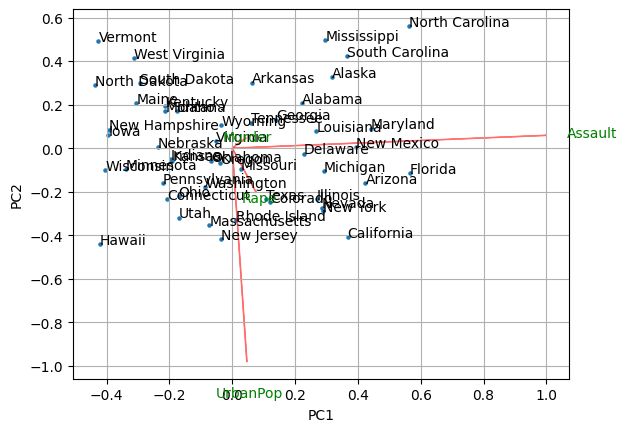

In [87]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

In the biplot, the length of each feature's arrow indicates its importance in the principal components. The long arrows for 'Assault' and 'UrbanPop' suggest that these variables are most informative in explaining the underlying patterns in the data. 'Assault' dominates the first principal component, while 'UrbanPop' is most important for the second component.

To quantify the importance of these variables for each principal component, we have included a table below.

It is worth noting that the mean values for 'Assault' and 'UrbanPop' are larger than those for the other variables, which may explain why they appear more important. This could be due to these variables 'swamping' the others and thus being overemphasised in the analysis.

In [88]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


## Standardised data

We standardise the data so that some features do not swamp the others.

In [89]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


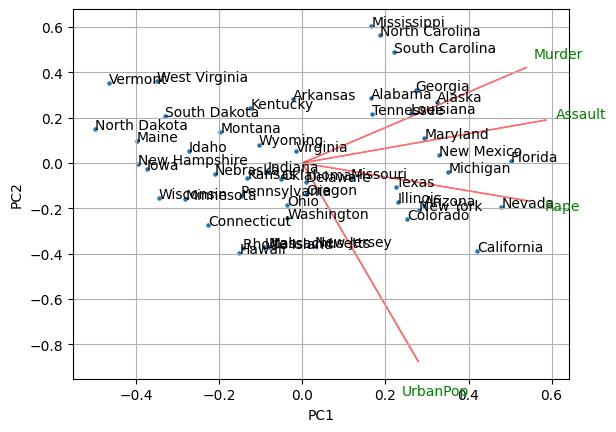

In [90]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

The standardized data reveals that three variables - Murder, Assault, and Rape - hold the most influence in explaining the variance observed in the first principal component. This suggests that the first principal component is a good indicator of the overall crime level of a city. In contrast, Urbanpop is shown to be the primary determinant of the second principal component.

The data appears to split into two distinct directions by the first principal component, with Murder, Assault, and Rape exhibiting positive loadings. Moreover, Assault and Rape exhibit more substantial loading regarding the first principle. Therefore, the first principal component can be viewed as a form of crime index for each city.

Cities with high crime rates, such as Murder, Assault, and Rape combined, are grouped to the right-hand side of the first principal component (i.e. the group of cities to the right of 0.2 on the PC1 axis). Examples of such cities include Florida, Michigan, New Mexico, Maryland, and Nevada. On the other hand, the cities to the left-hand side, specifically to the left of 0.2 on the PC1 axis, in the first principal component are those that have a low crime rate, such as North Dakota, Vermont, Maine, and New Hampshire.

Although the second principal component is dominated by UrbanPop, mainly indicates the level of population. Nonetheless, it did not have a significant effect on grouping data points, given that most of the variation was captured by the first component.

In [91]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


The feature importance table reveals that, after standardization, Murder and Rape, along with Assault, have roughly equal contributions to the first principal component. In contrast, UrbanPop remains the main contributor to the second principal component.

Text(0.5, 1.0, 'Cumulative Explained Variance')

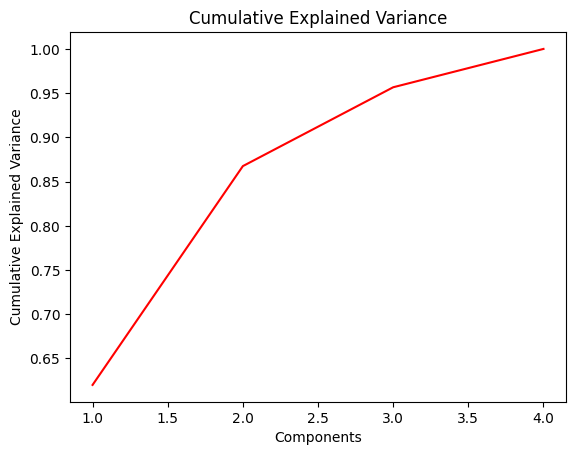

In [92]:
# Cumulative variance plot
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

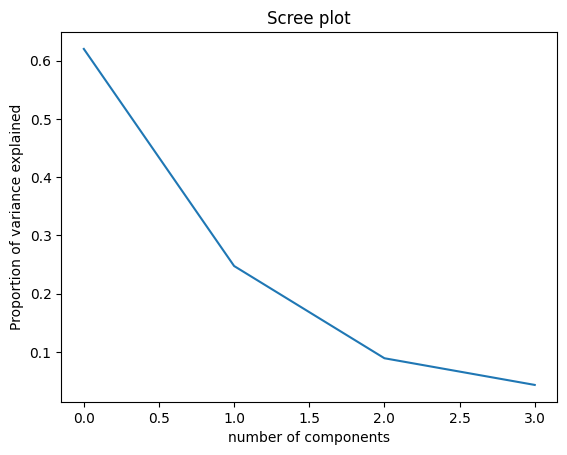

In [93]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('Proportion of variance explained')
plt.title("Scree plot")
plt.show()

The two plots have different focuses: the cumulative variance plot shows the total proportion of variance explained by increasing numbers of components, while the scree plot displays the individual proportion of variance explained by each component.

In PCA to determine the appropriate number of principal components required for dimensionality reduction, we need to identify the number of components that explain a significant portion of the variation in our data. In our case, we can observe that the first two components explain over 85% of the variance in the cumulative variance plot. The scree plot has a distinctive "elbow" at the second component, indicating that this is the optimal number of components to select. We therefore, now have 2 variables down from 5 variables.

In [94]:
pca_df = pd.DataFrame(X_std_trans[:,0:2], index = df.index)
pca_df.head()

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543


We will now perform both Hierarchical Clustering and K-means with these data and
compare the results.

## Hierarchical clustering

Hierarchical clustering helps to visualize clustering using a dendrogram plot. In our case, we will use Euclidean distance as the distance metric between observations. To determine the method used to measure the distance between clusters, we plotted dendrograms for the single, complete, and average linkage methods. This allowed us to determine which method produced the most meaningful and interpretable clustering results.

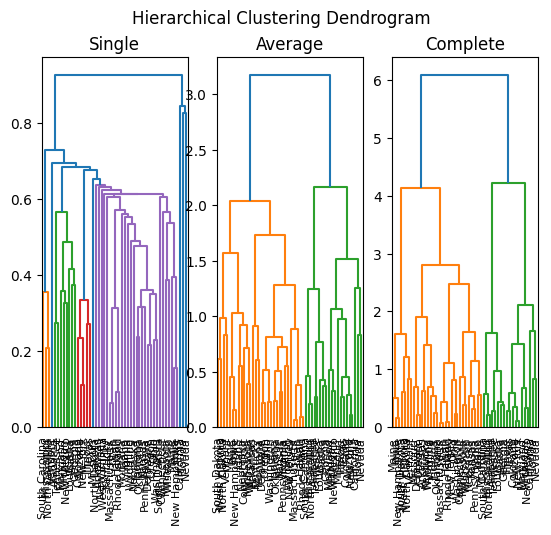

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

Based on the dendrograms generated for the single, complete, and average linkage methods, the complete linkage method results in a more evenly dispersed and balanced clustering of the data. Therefore, it will be the preferred method for further analysis. The dendrogram for the complete linkage method is shown below, providing a clearer visual representation of the clustering.

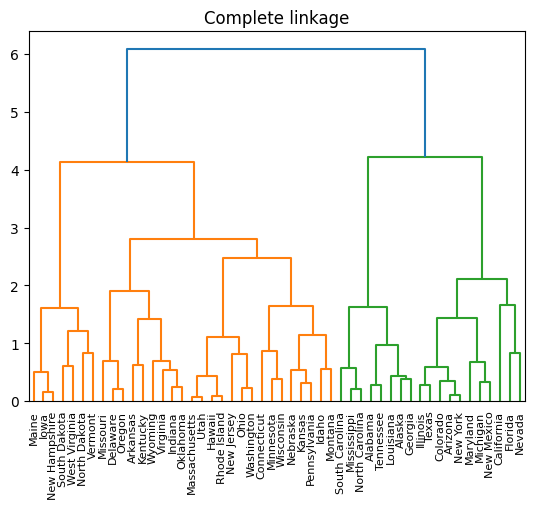

In [96]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

In [97]:
from scipy.cluster.hierarchy import fcluster

# obtain dendrogram and equate it to Z
Z = linkage(pca_df, method='complete')

# Obtain cluster labels for k=2
k = 2
labels = fcluster(Z, k, criterion='maxclust')

# Define a list to hold the cities for each cluster label
cluster1_cities = []
cluster2_cities = []

# Iterate through the cities and labels, adding each city to the appropriate list
for i, city in enumerate(pca_df.index):
    if labels[i] == 1:
        cluster1_cities.append(city)
    else:
        cluster2_cities.append(city)

# Print the cities in each cluster
print(f"Cities in Cluster 1: {len(cluster1_cities)}")
print(cluster1_cities)

print(f"\nCities in Cluster 2: {len(cluster2_cities)}")
print(cluster2_cities)

Cities in Cluster 1: 31
['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Cities in Cluster 2: 19
['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


With k=2, we observe that the resulting clusters have sizes of 31 and 19, respectively. Within the green cluster, the right branch at height 5 contains the group of cities with high crime rates that we previously noted, which are located to the right of 0.2 on the PC1 axis. These cities were expected to form a cluster due to their high values for Assault and Rape, with some influence from Murder.

The clustering closely aligns with the results obtained from our PCA analysis on the standardised data.Overall, the clustering analysis provides additional insight into the underlying patterns in the data, confirming that there are differences between different cities, and that the cities with the highest crime rates tend to share similar characteristics.

## K-means clustering

K-means clustering is an effective unsupervised machine learning algorithm used to partition a dataset into K clusters, with K being a pre-specified number of clusters. However, it requires predefining the number of clusters to be generated and can be affected by the initial position of centroids.

Based on our PCA biplot, it appears that the clusters are likely to be distinguishable from one another. Therefore, we will use the K-means algorithm for our clustering analysis, with a value of K set to 2. The resulting clusters are visualized in the figure below.

C:\Users\ah060\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


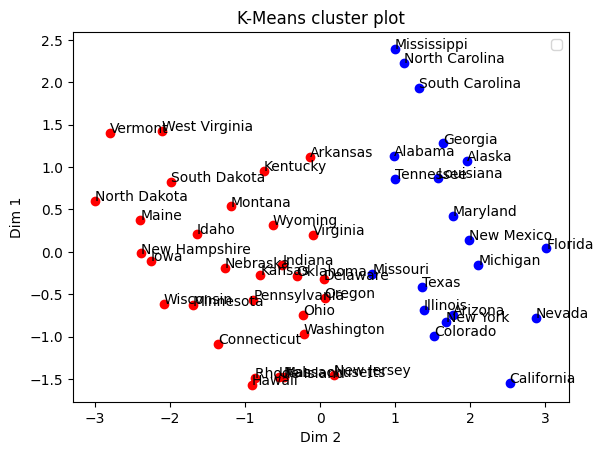

In [98]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [99]:
# Groups - translate to readable names
group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]

group0 = pca_df.index.values[group0_indices]
group1 = pca_df.index.values[group1_indices]


print(f"Cities in Cluster 1 ({len(group0_indices)}) :{group0}\n\n")
print(f"Cities in Cluster 2 ({len(group1_indices)}) : {group1}\n\n")



Cities in Cluster 1 (30) :['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Cities in Cluster 2 (20) : ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']




Based on the results of the K-means clustering, it appears that the algorithm has successfully clustered the cities based on their crime levels, specifically those related to Assault, Rape, and Murder. The cities with high crime rates are located to the right in blue, while cities with low crime rates are located to the left in red, which is consistent with the hierarchical clustering method.

However, there is one notable difference between the two methods. K-means clustering has identified the city of Missouri as having a high crime rate, whereas hierarchical clustering had previously classified it as having a low crime rate. This discrepancy is likely due to Missouri's location on the border between the two clusters, making it difficult to determine which cluster it should be assigned to with certainty.

Overall, both clustering methods have provided useful insights into the patterns and relationships within the  PCA-transformed standardized data. However, it is important to note that the choice of clustering algorithm and the number of clusters selected can have a significant impact on the resulting clusters and interpretations.